Bước 1: Liên kết Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Bước 2: Giải nén file code

In [ ]:
!unzip "/content/drive/MyDrive/pbl4/GaitSet2.zip"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-102.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-103.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-104.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-105.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-106.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-107.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-108.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-109.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-110.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-111.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-112.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-113.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-114.png  
 extracting: GaitSet2/gallery/004/nm-03/126/004-nm-03-126-1

Dữ liệu Gallery: Là tập dữ liệu tham chiếu, Gồm các chuỗi ảnh dáng đi của những người đã biết danh tính. Gồm 5 người ID 001, 002, 003, 004 và 006. Mỗi người gồm có 4 trường hợp dáng đi nm-01, nm-02, nm-03 và nm-04. Mỗi trường hợp gồm nhiều góc nhìn khác nhau từ 0 đến 180 độ.  
Dữ liệu Probe: Là tập dữ liệu cần nhận dạng, Gồm các chuỗi ảnh dáng đi của người mà mô hình chưa biết danh tính trước, và phải so sánh với gallery bằng khoảng cách Euclid để xác định. Tất cả dữ liệu Probe được đánh ID là 000 và tất cả dữ liệu đều không trùng với Gallery. Tương ứng nm-05, nm06. Để tăng độ khó, sẽ thêm hai kiểu dáng đi mới không có trong Gallery là bg-01, bg-02 (mang cặp) và cl-01, cl-02 (mang áo khoác).  
Xác thực danh tính: chia 5 trường hợp để kiểm tra (Các ID cần nhận dạng phải có trong ID của Gallery).  
- Trường hợp 1: người có ID 001/bg-01/036  
- Trường hợp 2: người có ID 002/cl-01/090
- Trường hợp 3: người có ID 003/nm-06/000
- Trường hợp 4: người có ID 004/cl-02/126
- Trường hợp 5: người có ID 006/bg-02/018
(Do tập dữ liệu ID 005 bị lỗi nên bỏ qua, sử dụng ID 006)

Trường hợp 1

In [ ]:
from datetime import datetime
import numpy as np
import cv2

from GaitSet2.model.initialization import initialization
from GaitSet2.model.utils import evaluation
from GaitSet2.config import conf
import torch
import torch.nn as nn

def boolean_string(s):
    if s.upper() not in {'FALSE', 'TRUE'}:
        raise ValueError('Not a valid boolean string')
    return s.upper() == 'TRUE'

# Load trọng số mô hình đã train trước đó: GaitSet_CASIA-B_73_False_256_0.2_128_full_30-95400-encoder/optimizer.ptm
iter_value = 95400
batch_size_value = 1
cache_value = False

def de_diag(acc, each_angle=False):
    result = np.sum(acc - np.diag(np.diag(acc)), 1) / 10.0
    if not each_angle:
        result = np.mean(result)
    return result

m = initialization(conf, test=cache_value)[0]
m.load(iter_value)
time = datetime.now()
probe = m.transform('probe', batch_size_value)
gallery = m.transform('gallery', batch_size_value)
evaluation(probe, gallery)

Initialzing...
Initializing data source...
load data label:  []
load data label:  []
load data label:  []
Data initialization complete.
probe_source 1
gallery_source 220
test_source 0
Initializing model...
Model initialization complete.
This is the person with ID:  001


**Do chạy trên Colab nên sau khi test trường hợp cũ thì phải ngắt kết nối xóa thời gian chạy rồi chạy lại từ bước 1 và 2. Nếu không thì khi test trường hợp tiếp theo sẽ bị lỗi hiển thị trường hợp cũ.**

Trường hợp 2: Vào content/GaitSet2/config.py và content/GaitSet2/model/config.py để sửa lại "probe":
        'dataset_path': "/content/GaitSet2/probe001", thành /content/GaitSet2/probe002

In [ ]:
from datetime import datetime
import numpy as np
import cv2

from GaitSet2.model.initialization import initialization
from GaitSet2.model.utils import evaluation
from GaitSet2.config import conf
import torch
import torch.nn as nn

def boolean_string(s):
    if s.upper() not in {'FALSE', 'TRUE'}:
        raise ValueError('Not a valid boolean string')
    return s.upper() == 'TRUE'

# Replace the command-line arguments with desired values
iter_value = 95400
batch_size_value = 1
cache_value = False

def de_diag(acc, each_angle=False):
    result = np.sum(acc - np.diag(np.diag(acc)), 1) / 10.0
    if not each_angle:
        result = np.mean(result)
    return result

m = initialization(conf, test=cache_value)[0]
m.load(iter_value)
time = datetime.now()
probe = m.transform('probe', batch_size_value)
gallery = m.transform('gallery', batch_size_value)
evaluation(probe, gallery)

Initialzing...
Initializing data source...
load data label:  []
load data label:  []
load data label:  []
Data initialization complete.
probe_source 1
gallery_source 220
test_source 0
Initializing model...
Model initialization complete.
This is the person with ID:  002


Trường hợp 3: Vào content/GaitSet2/config.py và content/GaitSet2/model/config.py để sửa lại "probe":
        'dataset_path': "/content/GaitSet2/probe001", thành /content/GaitSet2/probe003

In [ ]:
from datetime import datetime
import numpy as np
import cv2

from GaitSet2.model.initialization import initialization
from GaitSet2.model.utils import evaluation
from GaitSet2.config import conf
import torch
import torch.nn as nn

def boolean_string(s):
    if s.upper() not in {'FALSE', 'TRUE'}:
        raise ValueError('Not a valid boolean string')
    return s.upper() == 'TRUE'

# Replace the command-line arguments with desired values
iter_value = 95400
batch_size_value = 1
cache_value = False

def de_diag(acc, each_angle=False):
    result = np.sum(acc - np.diag(np.diag(acc)), 1) / 10.0
    if not each_angle:
        result = np.mean(result)
    return result

m = initialization(conf, test=cache_value)[0]
m.load(iter_value)
time = datetime.now()
probe = m.transform('probe', batch_size_value)
gallery = m.transform('gallery', batch_size_value)
evaluation(probe, gallery)

Initialzing...
Initializing data source...
load data label:  []
load data label:  []
load data label:  []
Data initialization complete.
probe_source 1
gallery_source 220
test_source 0
Initializing model...
Model initialization complete.
This is the person with ID:  003


Trường hợp 4: Vào content/GaitSet2/config.py và content/GaitSet2/model/config.py để sửa lại "probe":
        'dataset_path': "/content/GaitSet2/probe001", thành /content/GaitSet2/probe004

In [ ]:
from datetime import datetime
import numpy as np
import cv2

from GaitSet2.model.initialization import initialization
from GaitSet2.model.utils import evaluation
from GaitSet2.config import conf
import torch
import torch.nn as nn

def boolean_string(s):
    if s.upper() not in {'FALSE', 'TRUE'}:
        raise ValueError('Not a valid boolean string')
    return s.upper() == 'TRUE'

# Replace the command-line arguments with desired values
iter_value = 95400
batch_size_value = 1
cache_value = False

def de_diag(acc, each_angle=False):
    result = np.sum(acc - np.diag(np.diag(acc)), 1) / 10.0
    if not each_angle:
        result = np.mean(result)
    return result

m = initialization(conf, test=cache_value)[0]
m.load(iter_value)
time = datetime.now()
probe = m.transform('probe', batch_size_value)
gallery = m.transform('gallery', batch_size_value)
evaluation(probe, gallery)

Initialzing...
Initializing data source...
load data label:  []
load data label:  []
load data label:  []
Data initialization complete.
probe_source 1
gallery_source 220
test_source 0
Initializing model...
Model initialization complete.
This is the person with ID:  004


Trường hợp 5: Vào content/GaitSet2/config.py và content/GaitSet2/model/config.py để sửa lại "probe":
        'dataset_path': "/content/GaitSet2/probe001", thành /content/GaitSet2/probe005

In [ ]:
from datetime import datetime
import numpy as np
import cv2

from GaitSet2.model.initialization import initialization
from GaitSet2.model.utils import evaluation
from GaitSet2.config import conf
import torch
import torch.nn as nn

def boolean_string(s):
    if s.upper() not in {'FALSE', 'TRUE'}:
        raise ValueError('Not a valid boolean string')
    return s.upper() == 'TRUE'

# Replace the command-line arguments with desired values
iter_value = 95400
batch_size_value = 1
cache_value = False

def de_diag(acc, each_angle=False):
    result = np.sum(acc - np.diag(np.diag(acc)), 1) / 10.0
    if not each_angle:
        result = np.mean(result)
    return result

m = initialization(conf, test=cache_value)[0]
m.load(iter_value)
time = datetime.now()
probe = m.transform('probe', batch_size_value)
gallery = m.transform('gallery', batch_size_value)
evaluation(probe, gallery)

Initialzing...
Initializing data source...
load data label:  []
load data label:  []
load data label:  []
Data initialization complete.
probe_source 1
gallery_source 220
test_source 0
Initializing model...
Model initialization complete.
This is the person with ID:  006


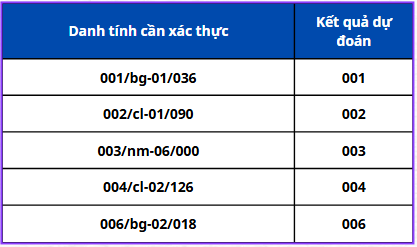

Nhận xét: cả 5 trường hợp xác minh danh tính đều đúng. Chứng tỏ mô hình dự đoán rất chính xác kể cả các trường hợp khó như mang cặp và mang áo khoác.  
Mô hình chỉ dự đoán đúng khi ID người cần nhận dạng có trong Gallery. Ví dụ nếu đưa danh tính cần xác thực là 007 thì mô hình sẽ dự đoán sai do Gallery chỉ chứa từ 001,002,003,004 và 006.